In [1]:
import os
import pandas
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = []


In [3]:
for filename in os.listdir("./data"):
    data = pandas.read_csv("./data/"+filename)
    dataset.append(data[['AF3', 'F3', 'T7', 'O1', 'P8', 'FC6', 'F8']])
    
    
    

In [4]:
#Constantes que usare luego


Total_time = 250 #4.1666666 min * 60 sec/min
data_per_sec = 32000 / 250 # 128
Time_inicio = 10
slides_inicio = Time_inicio * data_per_sec
slides_inicio

ventana_estabilidad = 640 # 5seg


In [5]:
# quitamos primeros 10 segundos y nos quedamos con 30000 datos

for data in dataset:
    data = data.loc[slides_inicio:slides_inicio + 29999,:]

In [6]:
from scipy.fftpack import fft
import numpy as np

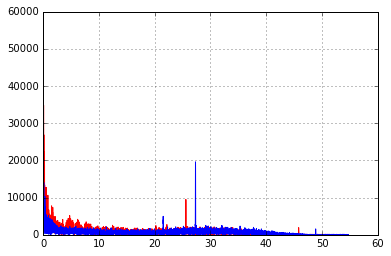

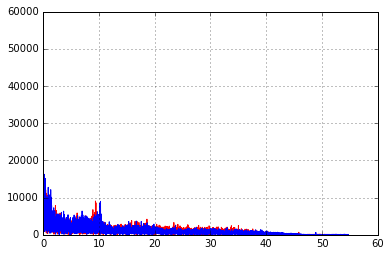

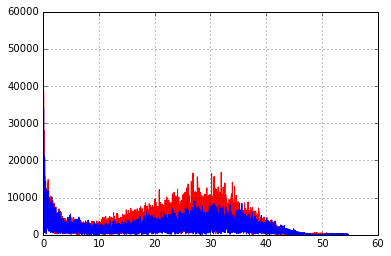

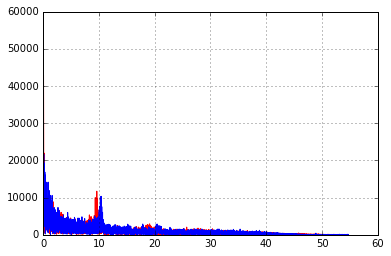

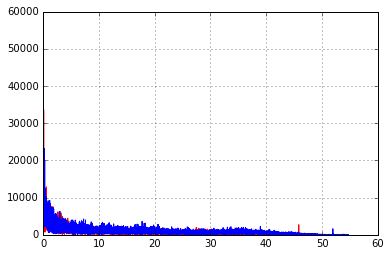

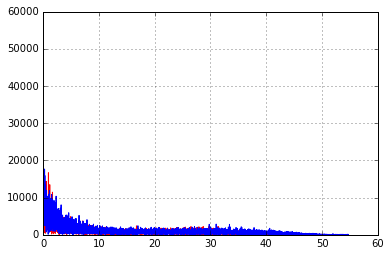

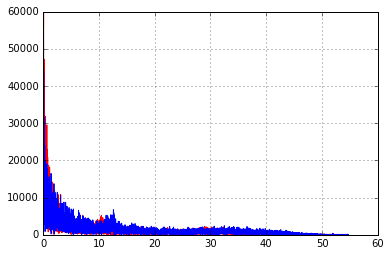

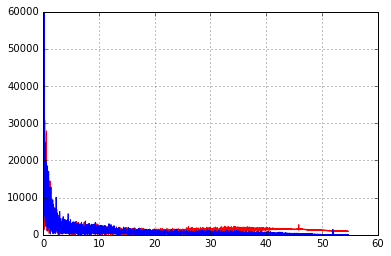

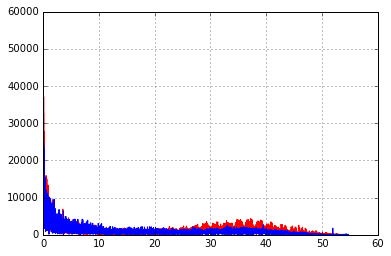

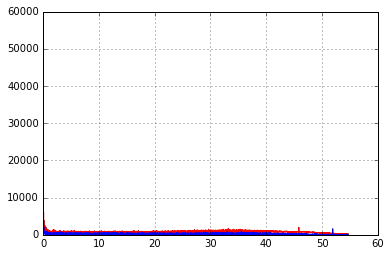

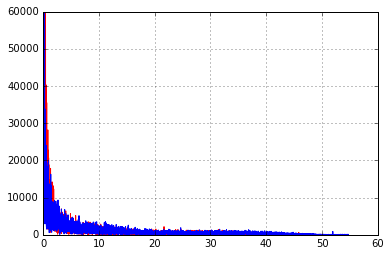

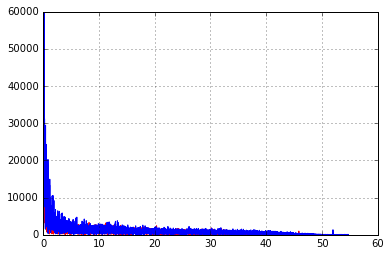

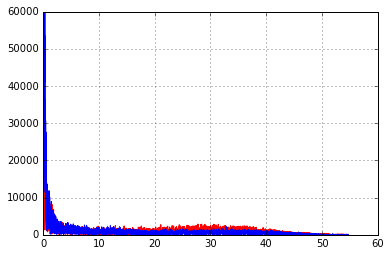

In [7]:
#Ejemplo de como se hace el FFT
N = 7000
# sample spacing
T = 1.0 / 128.0
x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(dataset[5]['AF3'])
xf = np.linspace(0.0, 1.0/(2.0*T), N/2)

#test de FFT 

for data in dataset:
    plt.plot(x, np.abs(fft(data['F3'][:15000])[0:7000]),color="red")
    plt.plot(x, np.abs(fft(data['F3'][15000:])[0:7000]),color="blue")
    plt.ylim([0,6e4])
    plt.grid()
    plt.show()

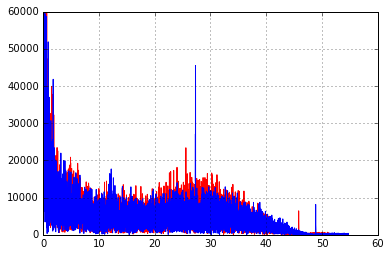

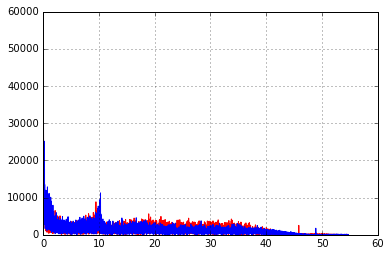

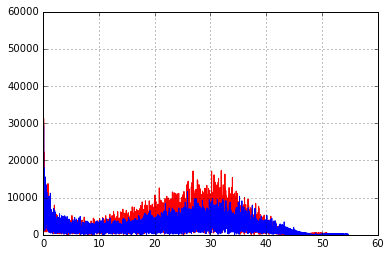

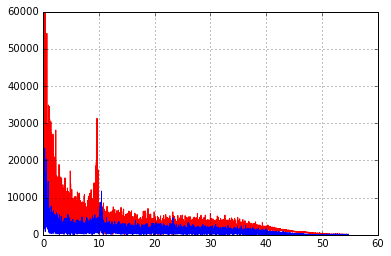

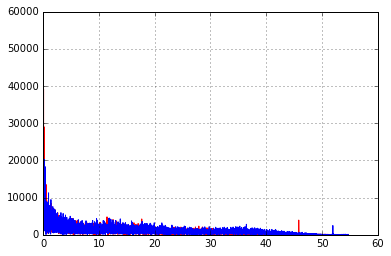

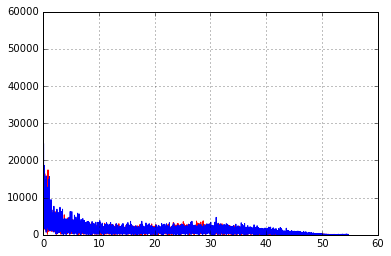

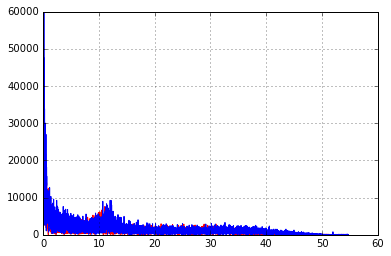

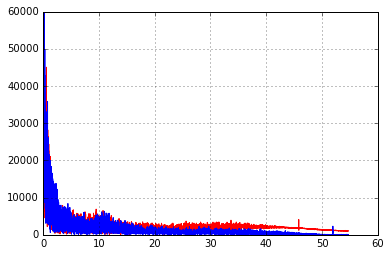

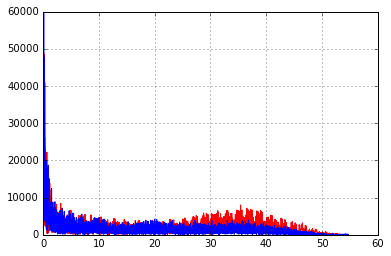

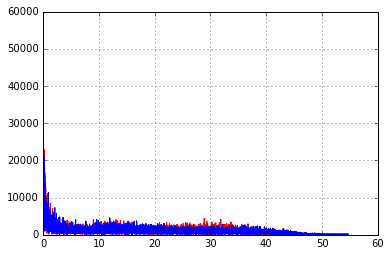

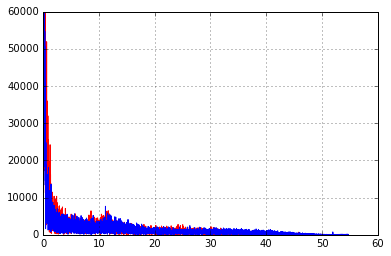

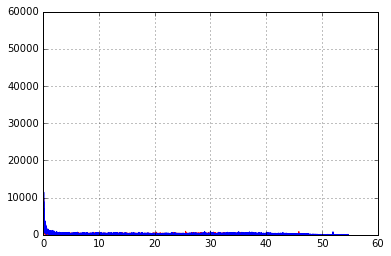

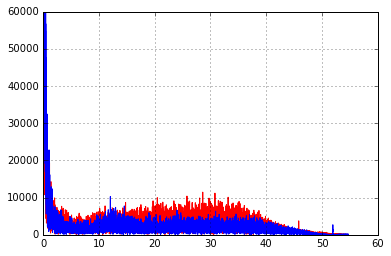

In [8]:
#Comparacion de fft para un solo Sensor P8

for data in dataset:
    plt.plot(x, np.abs(fft(data['P8'][:15000])[0:7000]),color="red")
    plt.plot(x, np.abs(fft(data['P8'][15000:])[0:7000]),color="blue")
    plt.ylim([0,6e4])
    plt.grid()
    plt.show()

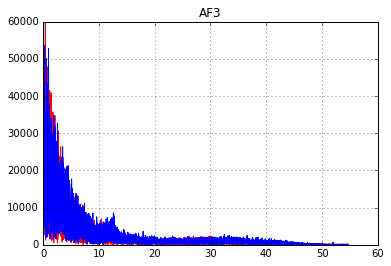

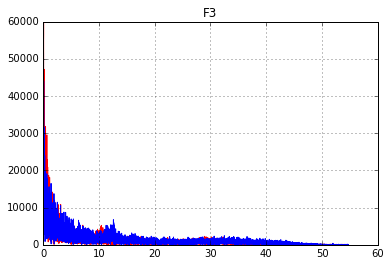

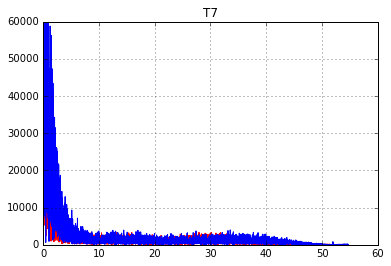

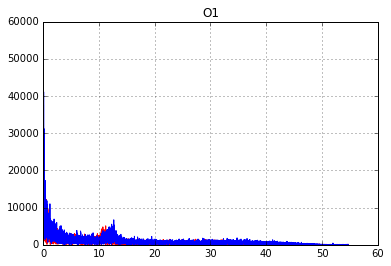

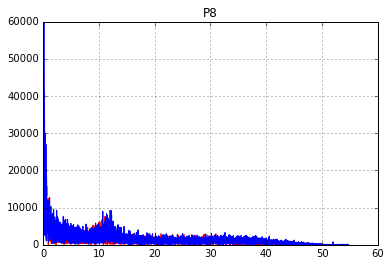

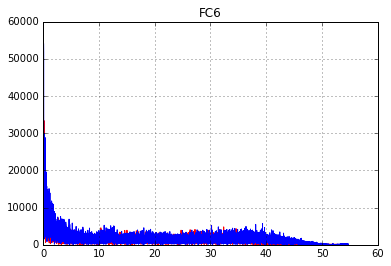

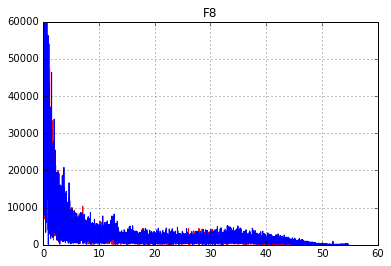

In [9]:
user = 6

for c in dataset[user].columns:
    plt.plot(x, np.abs(fft(dataset[user][c][:15000])[0:7000]),color="red")
    plt.plot(x, np.abs(fft(dataset[user][c][15000:])[0:7000]),color="blue")
    plt.ylim([0,6e4])
    plt.title(c)
    plt.grid()
    plt.show()

In [10]:
dftt = []
pos = [i + 'p' for i in dataset[0].columns]
neg = [i + 'n' for i in dataset[0].columns]
pos + neg

for u in dataset:
    df_ = pandas.DataFrame(index=[i for i in range(7000)], columns = pos + neg)
    df_ = df_.fillna(0) 
    for c in dataset[user]:
        df_[c+'p'] = np.abs(fft(u[c][:15000])[0:7000])
        df_[c+'n'] = np.abs(fft(u[c][15000:])[0:7000])
    dftt.append(df_)

In [11]:
dftt[1].describe()


,AF3p,F3p,T7p,O1p,P8p,FC6p,F8p,AF3n,F3n,T7n,O1n,P8n,FC6n,F8n
count,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03,7.000000e+03
mean,9.987681e+03,1.113509e+04,1.135083e+04,9.174050e+03,1.085933e+04,1.049793e+04,1.109498e+04,1.054817e+04,1.177649e+04,1.188268e+04,9.808065e+03,1.145535e+04,1.120442e+04,1.556082e+04
std,7.127977e+05,8.447157e+05,8.415865e+05,7.248719e+05,7.935658e+05,7.734658e+05,7.874851e+05,7.609901e+05,9.006598e+05,8.982037e+05,7.742658e+05,8.498205e+05,8.242971e+05,8.445970e+05
min,2.332814e+00,1.792166e+00,1.271614e+00,4.442661e-01,3.670551e+00,1.450691e+00,1.022303e+00,3.197159e+00,5.425858e-01,4.493479e+00,1.371534e+00,4.071194e-01,2.303631e+00,7.774504e-01
25%,1.761258e+02,1.652234e+02,2.809857e+02,1.244571e+02,2.867382e+02,1.789491e+02,2.098246e+02,2.439176e+02,1.991203e+02,3.252079e+02,1.460428e+02,3.401353e+02,2.702724e+02,2.901960e+02
50%,8.289525e+02,7.064851e+02,9.874045e+02,3.526212e+02,1.061577e+03,8.269901e+02,9.206665e+02,7.411025e+02,6.206576e+02,8.484240e+02,3.749947e+02,9.157643e+02,7.765271e+02,8.983450e+02
75%,1.656827e+03,1.415364e+03,1.699168e+03,6.488288e+02,1.884023e+03,1.626472e+03,1.911924e+03,1.551685e+03,1.239727e+03,1.425004e+03,6.682439e+02,1.628588e+03,1.486220e+03,1.880764e+03
max,5.963805e+07,7.067494e+07,7.041331e+07,6.064757e+07,6.639530e+07,6.471386e+07,6.588689e+07,6.367017e+07,7.535554e+07,7.515013e+07,6.478022e+07,7.110213e+07,6.896672e+07,7.063310e+07


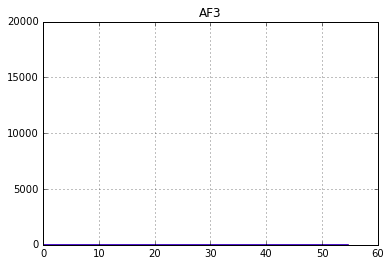

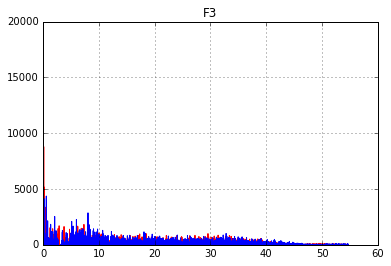

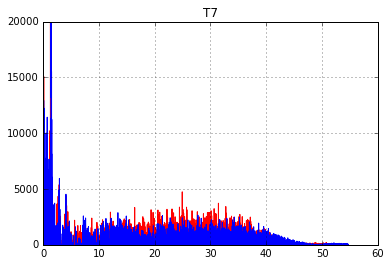

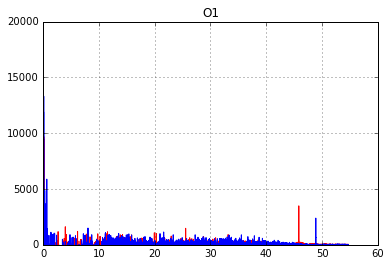

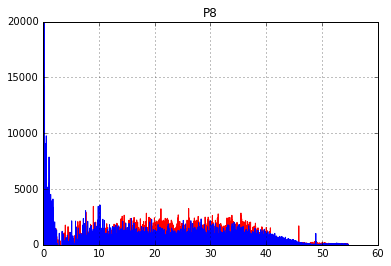

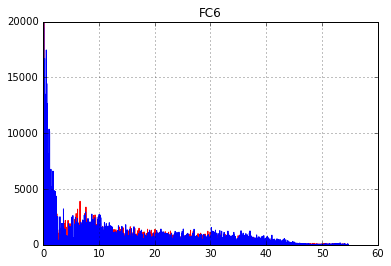

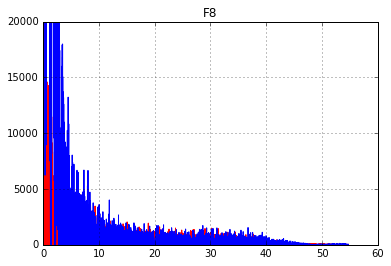

In [12]:
user = 1

for c in dataset[user].columns:
    plt.plot(x, dftt[user][c+'p']-dftt[user]['AF3'+'p'],color="red")
    plt.plot(x, dftt[user][c+'n']-dftt[user]['AF3'+'n'],color="blue")
    plt.ylim([0,2e4])
    plt.title(c)
    plt.grid()
    plt.show()
    

In [13]:
# Define brain 
ondas = {
    "alpha": [8.0,13.0],
    "beta": [13.0,30.0],
    "theta": [4.0,8.0],
    "delta": [0.0,4.0]
}


In [14]:
for u in dftt:
    u["frecuency"] = [i/128.0 for i in range(u.shape[0])]
    

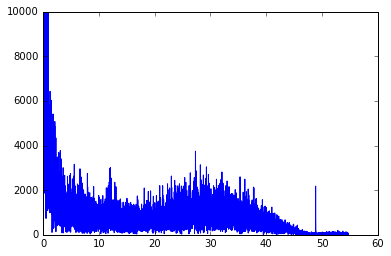

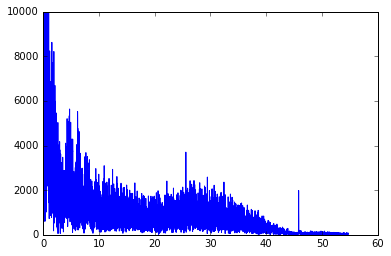

In [15]:
plt.plot(dftt[0]["frecuency"],dftt[0]["AF3n"])
plt.ylim([0,1e4])
plt.show()
plt.plot(dftt[0]["frecuency"],dftt[0]["AF3p"])
plt.ylim([0,1e4])
plt.show()

In [16]:
count = 0
for u in dftt:
    u["user"] = count
    count += 1

In [17]:
dfttA = pandas.concat([u for u in dftt])


In [18]:
dfttA[(dfttA["frecuency"] > 8.0) & (dfttA["frecuency"] < 10.0) & (dfttA["user"] == 0)].mean()


AF3p         1339.389942
F3p          1196.862441
T7p          2192.471454
O1p          1470.754679
P8p          5468.572335
FC6p         1521.697100
F8p          2459.488369
AF3n          783.515956
F3n           673.739203
T7n          1913.708441
O1n          1443.139021
P8n          4765.279770
FC6n          813.397445
F8n          1352.825534
frecuency       9.000000
user            0.000000
dtype: float64

In [19]:
dfttA[(dfttA["frecuency"] > 8.0) & (dfttA["frecuency"] < 10.0)].groupby(['user']).mean()


,AF3p,F3p,T7p,O1p,P8p,FC6p,F8p,AF3n,F3n,T7n,O1n,P8n,FC6n,F8n,frecuency
user,,,,,,,,,,,,,,,
0,1339.389942,1196.862441,2192.471454,1470.754679,5468.572335,1521.697100,2459.488369,783.515956,673.739203,1913.708441,1443.139021,4765.279770,813.397445,1352.825534,9.0
1,2686.475587,2337.951468,1444.874126,738.880903,2413.308691,2626.335560,2869.796265,2795.661687,2350.936477,1301.513430,875.639186,2432.170703,2643.747329,3313.174079,9.0
2,2120.897519,1516.837701,2302.201114,1320.600812,1637.537423,1516.436272,2251.089518,1667.725551,1190.665964,1634.636402,1052.205055,1520.589164,1429.525905,1963.466770,9.0
3,3119.084195,2705.353768,1220.325725,1895.382355,7336.347409,2540.893531,2851.561786,2198.514827,1915.540980,970.319475,1926.732270,1983.238767,1969.811328,2338.837707,9.0
4,1193.097368,1005.781073,932.342619,772.244718,1274.476612,1164.757343,1195.378874,1404.943555,1187.774579,1024.856054,853.920102,1442.866534,1356.540635,1306.019865,9.0
5,1487.113989,938.440332,1107.056901,758.960752,1229.280832,1104.105743,1558.960715,2227.497501,1168.593860,1210.649206,924.723443,1424.906077,1479.678030,2283.231066,9.0
6,2535.753334,1502.631424,1107.024217,1012.333985,2112.053580,1241.136372,2135.917442,3178.180470,1737.813194,1383.647293,1139.931918,2123.245825,1509.460050,2760.743670,9.0
7,2247.029593,1095.535013,2641.542865,1198.550203,2586.506635,2954.501160,3524.555162,2066.706600,1195.449521,1797.374709,1390.723086,2037.438825,2222.309723,2935.372923,9.0
8,2783.753243,1013.095458,1800.314834,1758.909665,1926.766700,2001.334695,2243.174056,3599.551082,1202.632950,1395.261898,262.721401,1791.983591,1985.374242,2245.415695,9.0


In [20]:
ondaMean = []

for wave in ondas:
    ondaMean.append(dfttA[(dfttA["frecuency"] > ondas[wave][0]) & 
                          (dfttA["frecuency"] < ondas[wave][1])].groupby(['user']).mean()) 
    

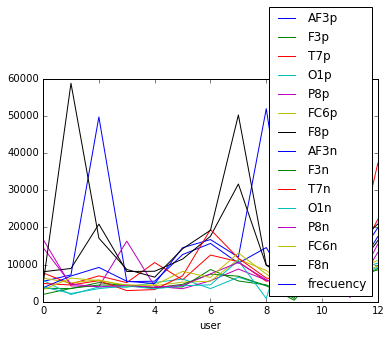

In [21]:
ondaMean[0].plot()


In [22]:
import seaborn as sns

sns.set_style("whitegrid")
sns.set_context("notebook", font_scale=1.5)


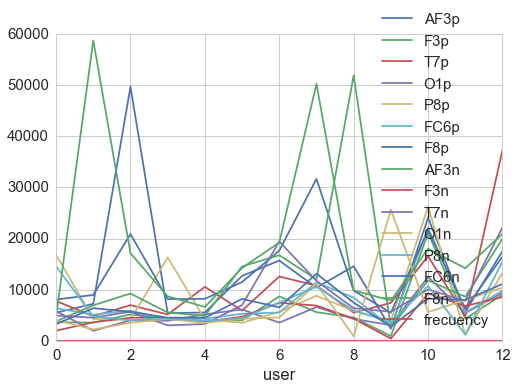

In [23]:
ondaMean[0].plot()


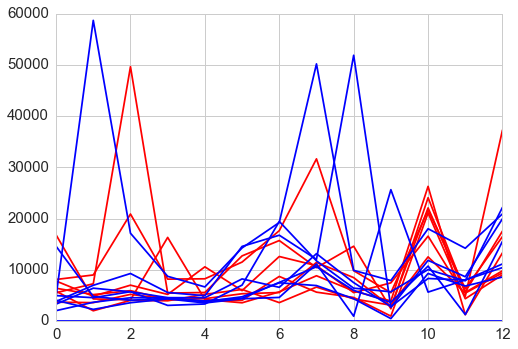

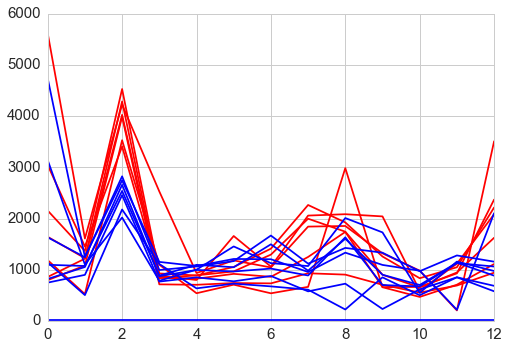

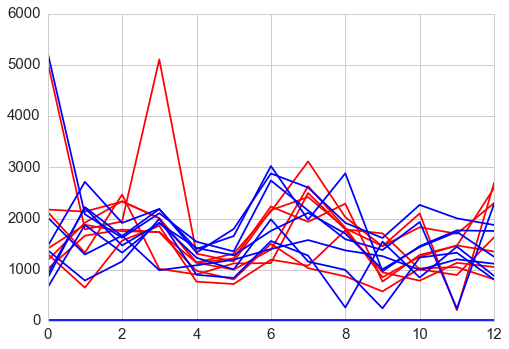

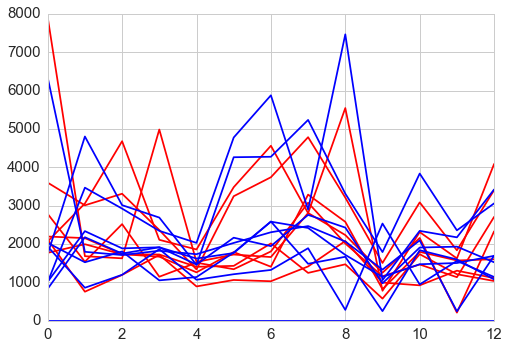

In [24]:
for wav in ondaMean:
    for w in wav:
        if "n" in w:
            
            plt.plot(wav[w],color="blue")
        else:
            plt.plot(wav[w],color="red")
    plt.show()


In [26]:
ondaMean

[              AF3p           F3p           T7p           O1p           P8p  \
 user                                                                         
 0      5487.188512   3643.006826   7777.973724   5776.017745  16797.939884   
 1      7233.605242   3550.670533   4801.220072   1959.979793   4277.957986   
 2     49681.981319   5168.717838   6966.153799   3998.645907   4093.284610   
 3      5413.201093   4237.041246   5160.166766   3915.861141  16300.891860   
 4      5536.371746   3849.301915  10550.468876   5174.408542   4157.287874   
 5     12689.804193   4000.561329   5900.761893   6125.546905   3521.014257   
 6     15687.381783   8673.795617  12569.757477   3553.771844   5659.437175   
 7     10392.550347   5599.533227  10779.227320   6593.357026   8804.831550   
 8     14576.711911   4561.503664   5505.096792   4285.603101   5825.103207   
 9      2351.630754    917.692910   7418.044733   3051.628895   3883.525817   
 10    24068.339533  21083.364238  16548.726847  124

In [30]:
alpha = ondaMean[2].copy()




In [35]:
alphap = alpha[[i for i in alpha.columns if "p" in i]].copy()
alphan = alpha[[i for i in alpha.columns if "n" in i]].copy()
alphap["user"] = 1.0 #user 1 positivo
alphan["user"] = 0.0 #user 0 positivo

In [39]:
alphan = alphan.drop("frecuency", axis = 1)

In [41]:
alphan.columns = ['AF3', 'F3', 'T7', 'O1', 'P8', 'FC6', 'F8', 'user']
alphap.columns = ['AF3', 'F3', 'T7', 'O1', 'P8', 'FC6', 'F8', 'user']

In [42]:
alphaModel = pandas.concat([alphap,alphan])

In [43]:
alphaModel

,AF3,F3,T7,O1,P8,FC6,F8,user
user,,,,,,,,
0,1181.890520,1013.726952,2125.950290,1306.969272,5058.383402,1412.393031,2175.082419,1.0
1,1917.076963,1663.992322,1331.311938,648.077102,1788.661004,1876.795748,2135.168203,1.0
2,2339.023426,1783.316300,2466.545235,1567.282117,1942.553784,1750.492842,2330.550081,1.0
3,2006.020291,1731.858624,1015.409736,1856.213933,5110.954980,1736.469662,2005.741002,1.0
4,1133.879570,977.190762,906.105063,765.560943,1312.832134,1135.384281,1138.803664,1.0
5,1218.382872,808.936485,1121.216655,719.194038,1161.110237,1001.141706,1313.286191,1.0
6,2234.840496,1505.149895,1128.382206,1194.435787,2162.651425,1389.787700,2137.137082,1.0
7,1934.447838,1029.064984,2498.365843,1077.138859,2419.084092,2631.341437,3115.242322,1.0
8,2289.719929,869.289862,1786.870358,1767.948611,1805.702324,1818.055863,2026.247680,1.0


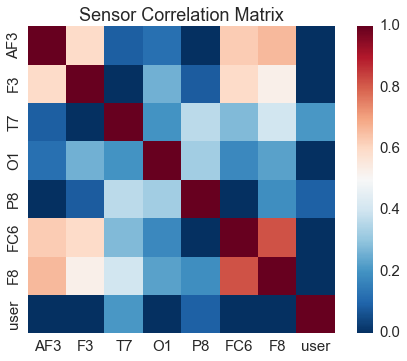

In [47]:
corr = alphaModel.corr()

plt.title("Sensor Correlation Matrix")
sns.heatmap(corr, vmin=0, vmax=1, square=True, cmap="RdBu_r")
plt.savefig('./pngs/sensorcorrelationmatrix.png', dpi=180)

Parece haber correlacion entre AF3 y F3,FC6,F8

que todo sea azul, dice que hay poco correlacion entre las variables


In [60]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import svm
from sklearn.model_selection import cross_val_score

In [53]:
#para hacer una sample aleatorio ya que user es la mitad 1 y la otra mitad 0
X_train, X_test, y_train, y_test = train_test_split(alphaModel.iloc[:,0:-1],alphaModel["user"],
                                                    test_size=0.0, random_state=0)

In [61]:
clf = RandomForestClassifier()

In [67]:
scores = cross_val_score(clf, X_train, y_train, cv=3)
scores.mean()*100                                            


38.333333333333329